2023-05-11 18:26:53,310 INFO Welcome to the CDS
2023-05-11 18:26:53,310 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-11 18:26:53,590 INFO Request is completed
2023-05-11 18:26:53,591 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data5/adaptor.mars.internal-1683743599.7239895-26230-6-b30bf86b-4c96-4611-bc4d-499123ebcd7f.nc to ../pyAPS_data/example/ERA5_2020-01-03T00:00_130.24_31.25_131.26_32.65.nc (8.5K)
2023-05-11 18:26:53,817 INFO Download rate 37.6K/s
2023-05-11 18:26:54,831 INFO Welcome to the CDS
2023-05-11 18:26:54,832 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-11 18:26:55,069 INFO Request is completed
2023-05-11 18:26:55,070 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data2/adaptor.mars.internal-1683743810.6669247-23948-9-88254f8e-3baa-497e-8750-25

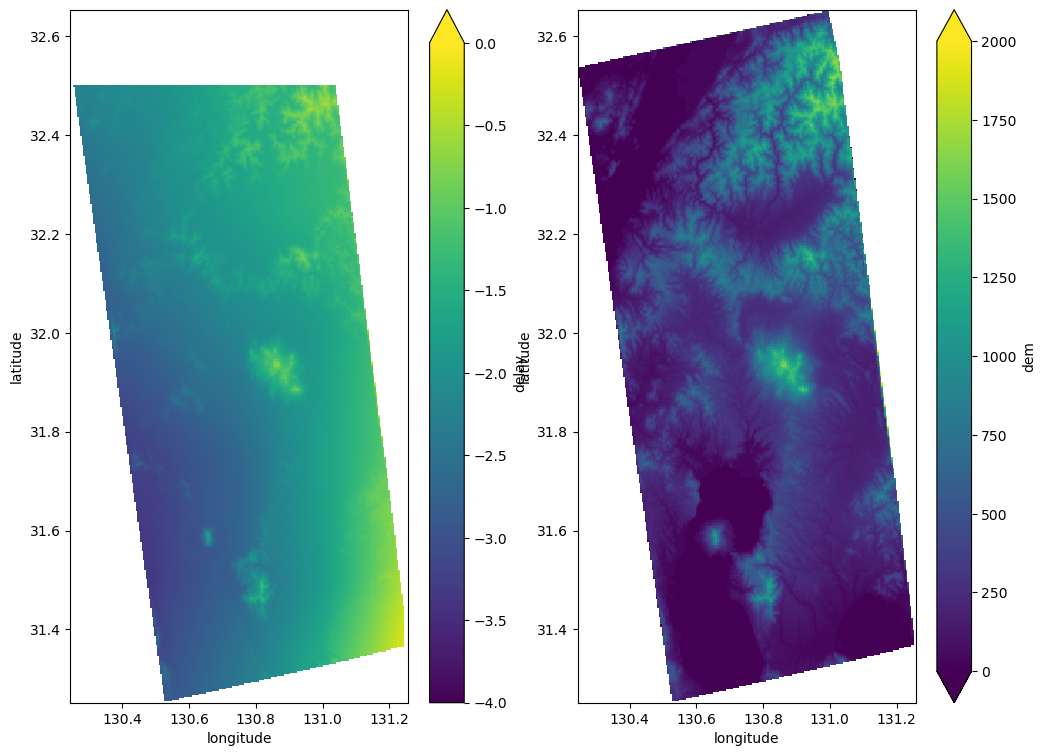

In [9]:
import sys
import xarray as xr
import matplotlib.pyplot as plt

# this relative path assumes you are in the notebooks directory
sys.path.append('..')
from phase_o_matic import presto_phase_delay

# this relative path assumes you are in the notebooks directory
dem = xr.open_dataset('../pyAPS_data/pyaps_geom.nc')['dem']
inc = xr.open_dataset('../pyAPS_data/pyaps_geom.nc')['inc']

work_dir = '../pyAPS_data/example'

t1 = presto_phase_delay(date = '2020-01-03', dem = dem, inc = inc, work_dir = work_dir, wavelength = 0.238403545)
t2 = presto_phase_delay(date = '2020-01-10', dem = dem, inc = inc, work_dir = work_dir, wavelength = 0.238403545)

delay_change = t2.isel(time = 0)['delay'] - t1.isel(time = 0)['delay']

fig, axes = plt.subplots(1, 2, figsize = (12, 9))
delay_change.plot(ax = axes[0], vmax = 0, vmin = -4)
dem.plot(ax = axes[1], vmin = 0, vmax = 2000)
plt.savefig('../images/usage.png')